## Realize as tarefas solicitadas abaixo:



1.   Aplique PCA para os datasets de cancer de mama e iris utilizando o pacote do scikit-learn;

2.   Para os dois datasets, plote o gráfico dos eigen-values e identifique se há ponto de inflexão e qual é (número de componentes principais a serem utilizadas);

3.   Aplique o LDA a partir do scikit-learn nos dois datasets (cancer de mama e iris);

4.   Plote um comparativo entre PCA e LDA com 2 componentes para cada dataset.  

## Importando bibliotecas


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

## Importando os datasets

In [ ]:
from sklearn.datasets import load_breast_cancer, load_iris

## Carregando os dados dos datasets

In [ ]:
cancer = load_breast_cancer()
iris = load_iris()

In [ ]:
list(cancer.target_names)

['malignant', 'benign']

## PCA

### PCA Iris

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
pca = decomposition.PCA()
pca.fit(X)
X = pca.transform(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92461872 0.05306648 0.01710261 0.00521218]
[25.09996044  6.01314738  3.41368064  1.88452351]


In [ ]:
cov_iris = pca.get_covariance()
pd.DataFrame(cov_iris)

,0,1,2,3
0,0.685694,-0.042434,1.274315,0.516271
1,-0.042434,0.189979,-0.329656,-0.121639
2,1.274315,-0.329656,3.116278,1.295609
3,0.516271,-0.121639,1.295609,0.581006


<Axes: >

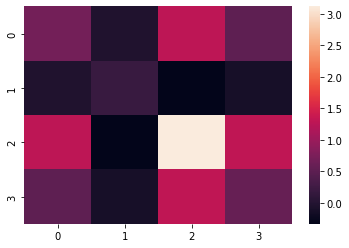

In [ ]:
sns.heatmap(cov_iris)

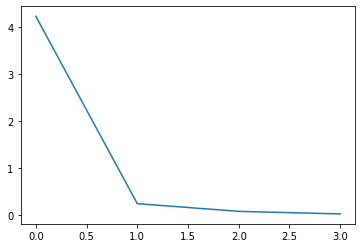

In [ ]:
eigen_values = pca.explained_variance_
sns.lineplot(y=eigen_values, x=range(eigen_values.shape[0]));

### PCA Cancer

In [ ]:
breast_cancer = datasets.load_breast_cancer()
type(breast_cancer)

sklearn.utils._bunch.Bunch

In [ ]:
raw_data = breast_cancer.data

In [ ]:
normalized_data = StandardScaler().fit_transform(raw_data)

In [ ]:
pca = decomposition.PCA()
pca_data = pca.fit_transform(normalized_data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
[86.93235745 56.90677266 40.04263937 33.57058877 30.62887007 26.2104161
 19.60102663 16.46800391 15.4017255  14.12602481 12.93205441 12.19019359
 11.71889139  9.4519063   7.31866075  6.74106325  5.81360925  5.47175363
  5.30591648  4.21066503  4.12971871  3.95133143  3.72155031  3.20519874
  2.96796958  2.15709923  1.98150547  0.95096438  0.65273958  0.27514088]


In [ ]:
cov_cancer = pca.get_covariance()
pd.DataFrame(cov_cancer)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,0.148001,-0.312179,...,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078
1,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,0.071527,-0.076572,...,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415
2,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,0.183349,-0.261937,...,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108
3,0.989095,0.321651,0.988244,1.001761,0.177340,0.499379,0.687191,0.824718,0.151559,-0.283608,...,0.964441,0.287995,0.960808,0.960902,0.123740,0.391098,0.513508,0.723288,0.143823,0.003744
4,0.170882,-0.023430,0.207643,0.177340,1.001761,0.660284,0.522903,0.554670,0.558757,0.585822,...,0.213495,0.036135,0.239273,0.207082,0.806742,0.473300,0.435691,0.503939,0.395004,0.500195
5,0.507015,0.237119,0.557917,0.499379,0.660284,1.001761,0.884675,0.832598,0.603702,0.566364,...,0.536258,0.248570,0.591250,0.510501,0.566537,0.867333,0.817712,0.817009,0.511122,0.688593
6,0.677955,0.302950,0.717396,0.687191,0.522903,0.884675,1.001761,0.923013,0.501548,0.337376,...,0.689448,0.300407,0.730849,0.677177,0.449612,0.756297,0.885659,0.862839,0.410185,0.515836
7,0.823977,0.293981,0.852475,0.824718,0.554670,0.832598,0.923013,1.001761,0.463312,0.167211,...,0.831779,0.293267,0.857430,0.811055,0.453550,0.668629,0.753724,0.911758,0.376406,0.369310
8,0.148001,0.071527,0.183349,0.151559,0.558757,0.603702,0.501548,0.463312,1.001761,0.480766,...,0.186055,0.090810,0.219554,0.177505,0.427426,0.474033,0.434485,0.431054,0.701058,0.439185
9,-0.312179,-0.076572,-0.261937,-0.283608,0.585822,0.566364,0.337376,0.167211,0.480766,1.001761,...,-0.254138,-0.051359,-0.205512,-0.232263,0.505831,0.459606,0.346843,0.175634,0.334607,0.768648


<Axes: >

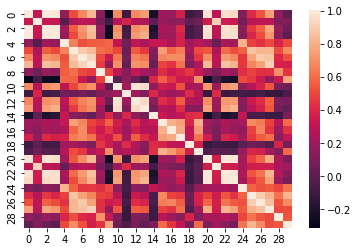

In [ ]:
sns.heatmap(cov_cancer)

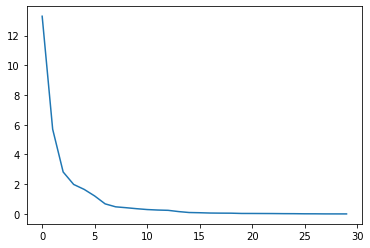

In [ ]:
eigen_values = pca.explained_variance_
sns.lineplot(y=eigen_values, x=range(eigen_values.shape[0]));

##LDA


###LDA Iris

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_lda = lda.transform(X)

print(lda.explained_variance_ratio_)

[0.9912126 0.0087874]


explained variance ratio (first two components): [0.92461872 0.05306648]


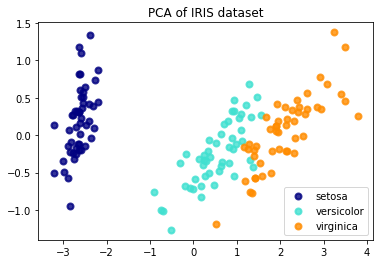

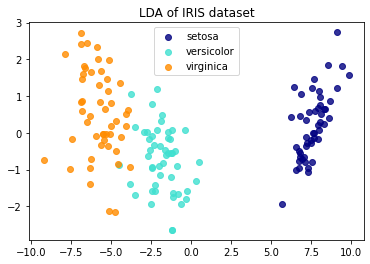

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_lda[y == i, 0], X_lda[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

###LDA Cancer

In [ ]:
raw_data = breast_cancer.data
target = breast_cancer.target
normalized_data = StandardScaler().fit_transform(raw_data)
target_names_cancer = breast_cancer.target_names

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(normalized_data, target)
X_lda2 = lda.transform(normalized_data)

print(lda.explained_variance_ratio_)

[1.]


explained variance ratio (first two components): [0.44272026 0.18971182]


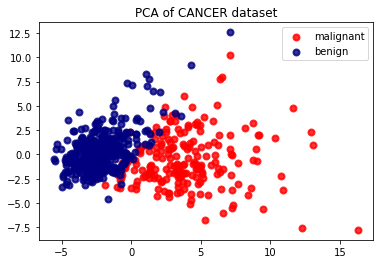

In [ ]:
pca = PCA(n_components=2)
X_pca2 = pca.fit(normalized_data).transform(normalized_data)

print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)


plt.figure()
colors = ["red", "navy"]
lw = 2

for color, i, target_names_cancer in zip(colors, [0, 1], target_names_cancer):
    plt.scatter(
        X_pca2[target == i, 0], X_pca2[target == i, 1], color=color, alpha=0.8, lw=lw, label=target_names_cancer
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of CANCER dataset")


plt.show()

In [ ]:
### Gráfico do LDA do dataset de cancer não foi plotado pelo número de componentes ser igual 1. Não foi possível rodar para n_components = 2 ###